## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# global variable
nx = 9
ny = 6

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

#         # Draw and display the corners
#         img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
#         plt.figure()
#         plt.imshow(img)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)


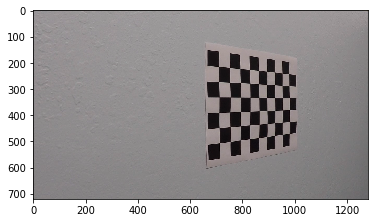

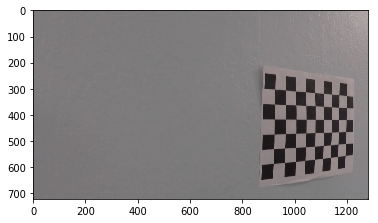

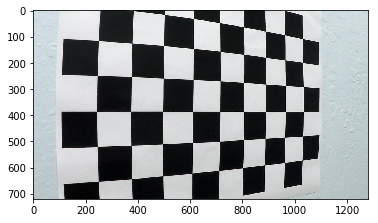

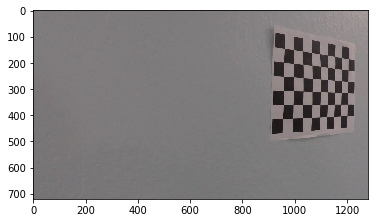

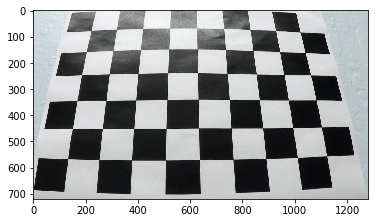

In [8]:
# # A function that takes an image, object points, and image points
# # performs the camera calibration, image distortion correction and 
# # returns the undistorted image
# def cal_undistort(img, objpoints, imgpoints):
#     # Use cv2.calibrateCamera() and cv2.undistort()
#     ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
#     dst = cv2.undistort(img, mtx, dist, None, mtx)
#     return dst

# undistorted = cal_undistort(img, objpoints, imgpoints)

# calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)

# # Step through the list and test undistorting chessboard
# for fname in images[15:20]:
#     img = cv2.imread(fname)
#     undistort_img = cv2.undistort(img, mtx, dist, None, mtx)
#     plt.figure()
#     plt.imshow(img)

## And so on and so forth...